In [ ]:
## Notebook env: cell2loc_env (cell2loc_env kernel)
## this notebook performs cell2location to *spatially* deconvolute cells using a reference annotated scRNAseq dataset

In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os

data_type = 'float32'

import cell2location

import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

# silence scanpy that prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

Global seed set to 0


In [2]:
results_folder = '/home/ssobti/projects/farnaz_spatial/output_data/monkey/cell2location/multi_ref_annot'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/reference_signatures'
run_name = f'{results_folder}/cell2location_map/N2_alpha0.5'

In [3]:
adata_file = f"{run_name}/sp.h5ad"
adata_vis = sc.read_h5ad(adata_file)
mod = cell2location.models.Cell2location.load(f"{run_name}", adata_vis)

INFO     File                                                                                                      
         /home/ssobti/projects/farnaz_spatial/output_data/monkey/cell2location/multi_ref_annot/cell2location_map/N2
         _alpha0.5/model.pt already downloaded                                                                     


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/30000:   0%|          | 1/30000 [00:06<52:29:53,  6.30s/it, v_num=1, elbo_train=5.99e+7]

`Trainer.fit` stopped: `max_steps=1` reached.


Epoch 1/30000:   0%|          | 1/30000 [00:06<52:34:55,  6.31s/it, v_num=1, elbo_train=5.99e+7]


In [4]:
adata_vis.obsm['q05_cell_abundance_w_sf'].to_csv(f"{run_name}/q05_cell_abundance_w_sf.csv")
adata_vis.obs

in_tissue  array_row  array_col  \
spot_id                                                            
1149G_A1_096_AACACTTGGCAAGGAA-1          1         47         71   
1149G_A1_096_AACAGGATTCATAGTT-1          1         49         43   
1149G_A1_096_AACAGGTTATTGCACC-1          1         28         86   
1149G_A1_096_AACAGGTTCACCGAAG-1          1         51         41   
1149G_A1_096_AACATACTCATATGCG-1          1         50          6   
...                                    ...        ...        ...   
1080B_D1_327_TGTTCTGCTCTGTCGT-1          1         39         39   
1080B_D1_327_TGTTGCGTCCAAGATT-1          1         51         65   
1080B_D1_327_TGTTGGAACCTTCCGC-1          1         35         35   
1080B_D1_327_TGTTGGAACGAGGTCA-1          1         28         72   
1080B_D1_327_TGTTGGCCTACACGTG-1          1         37        127   

                                       sample  n_genes_by_counts  \
spot_id                                                            
1149G_A1_096_AACACTTGGCAAGGAA-1  1149G_A1_096                 24   
1149G_A1_096_AACAGGATTCATAGTT-1  1149G_A1_096                 29   
1149G_A1_096_AACAGGTTATTGCACC-1  1149G_A1_096                293   
1149G_A1_096_AACAGGTTCACCGAAG-1  1149G_A1_096                 16   
1149G_A1_096_AACATACTCATATGCG-1  1149G_A1_096                 78   
...                                       ...                ...   
1080B_D1_327_TGTTCTGCTCTGTCGT-1  1080B_D1_327                120   
1080B_D1_327_TGTTGCGTCCAAGATT-1  1080B_D1_327                675   
1080B_D1_327_TGTTGGAACCTTCCGC-1  1080B_D1_327                180   
1080B_D1_327_TGTTGGAACGAGGTCA-1  1080B_D1_327                467   
1080B_D1_327_TGTTGGCCTACACGTG-1  1080B_D1_327               3395   

                                 log1p_n_genes_by_counts  total_counts  \
spot_id                                                                  
1149G_A1_096_AACACTTGGCAAGGAA-1                 3.218876          42.0   
1149G_A1_096_AACAGGATTCATAGTT-1                 3.401197          32.0   
1149G_A1_096_AACAGGTTATTGCACC-1                 5.683580         411.0   
1149G_A1_096_AACAGGTTCACCGAAG-1                 2.833213          20.0   
1149G_A1_096_AACATACTCATATGCG-1                 4.369448          96.0   
...                                                  ...           ...   
1080B_D1_327_TGTTCTGCTCTGTCGT-1                 4.795791         132.0   
1080B_D1_327_TGTTGCGTCCAAGATT-1                 6.516193         855.0   
1080B_D1_327_TGTTGGAACCTTCCGC-1                 5.198497         203.0   
1080B_D1_327_TGTTGGAACGAGGTCA-1                 6.148468         553.0   
1080B_D1_327_TGTTGGCCTACACGTG-1                 8.130354        7436.0   

                                 log1p_total_counts  \
spot_id                                               
1149G_A1_096_AACACTTGGCAAGGAA-1            3.761200   
1149G_A1_096_AACAGGATTCATAGTT-1            3.496508   
1149G_A1_096_AACAGGTTATTGCACC-1            6.021023   
1149G_A1_096_AACAGGTTCACCGAAG-1            3.044523   
1149G_A1_096_AACATACTCATATGCG-1            4.574711   
...                                             ...   
1080B_D1_327_TGTTCTGCTCTGTCGT-1            4.890349   
1080B_D1_327_TGTTGCGTCCAAGATT-1            6.752270   
1080B_D1_327_TGTTGGAACCTTCCGC-1            5.318120   
1080B_D1_327_TGTTGGAACGAGGTCA-1            6.317165   
1080B_D1_327_TGTTGGCCTACACGTG-1            8.914223   

                                 pct_counts_in_top_50_genes  \
spot_id                                                       
1149G_A1_096_AACACTTGGCAAGGAA-1                  100.000000   
1149G_A1_096_AACAGGATTCATAGTT-1                  100.000000   
1149G_A1_096_AACAGGTTATTGCACC-1                   33.333333   
1149G_A1_096_AACAGGTTCACCGAAG-1                  100.000000   
1149G_A1_096_AACATACTCATATGCG-1                   70.833333   
...                                                     ...   
1080B_D1_327_TGTTCTGCTCTGTCGT-1                   46.969697   
1080B_D1_327_TGTT

In [5]:
## select best display maxes for each cell type
## find the 99th percentile(s) for each slide in a each cell type (make table of it -- cell types are rows and slides are columns)

adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']
sample_annotated_cell_probs = adata_vis.obs[['sample'] + list(adata_vis.uns['mod']['factor_names'])]
tbl_99pctile = sample_annotated_cell_probs.groupby(['sample']).quantile(0.99)
min_max_means_of_99pctile = [np.mean(x) for x in zip(tbl_99pctile.min(axis = 0), tbl_99pctile.max(axis = 0))]

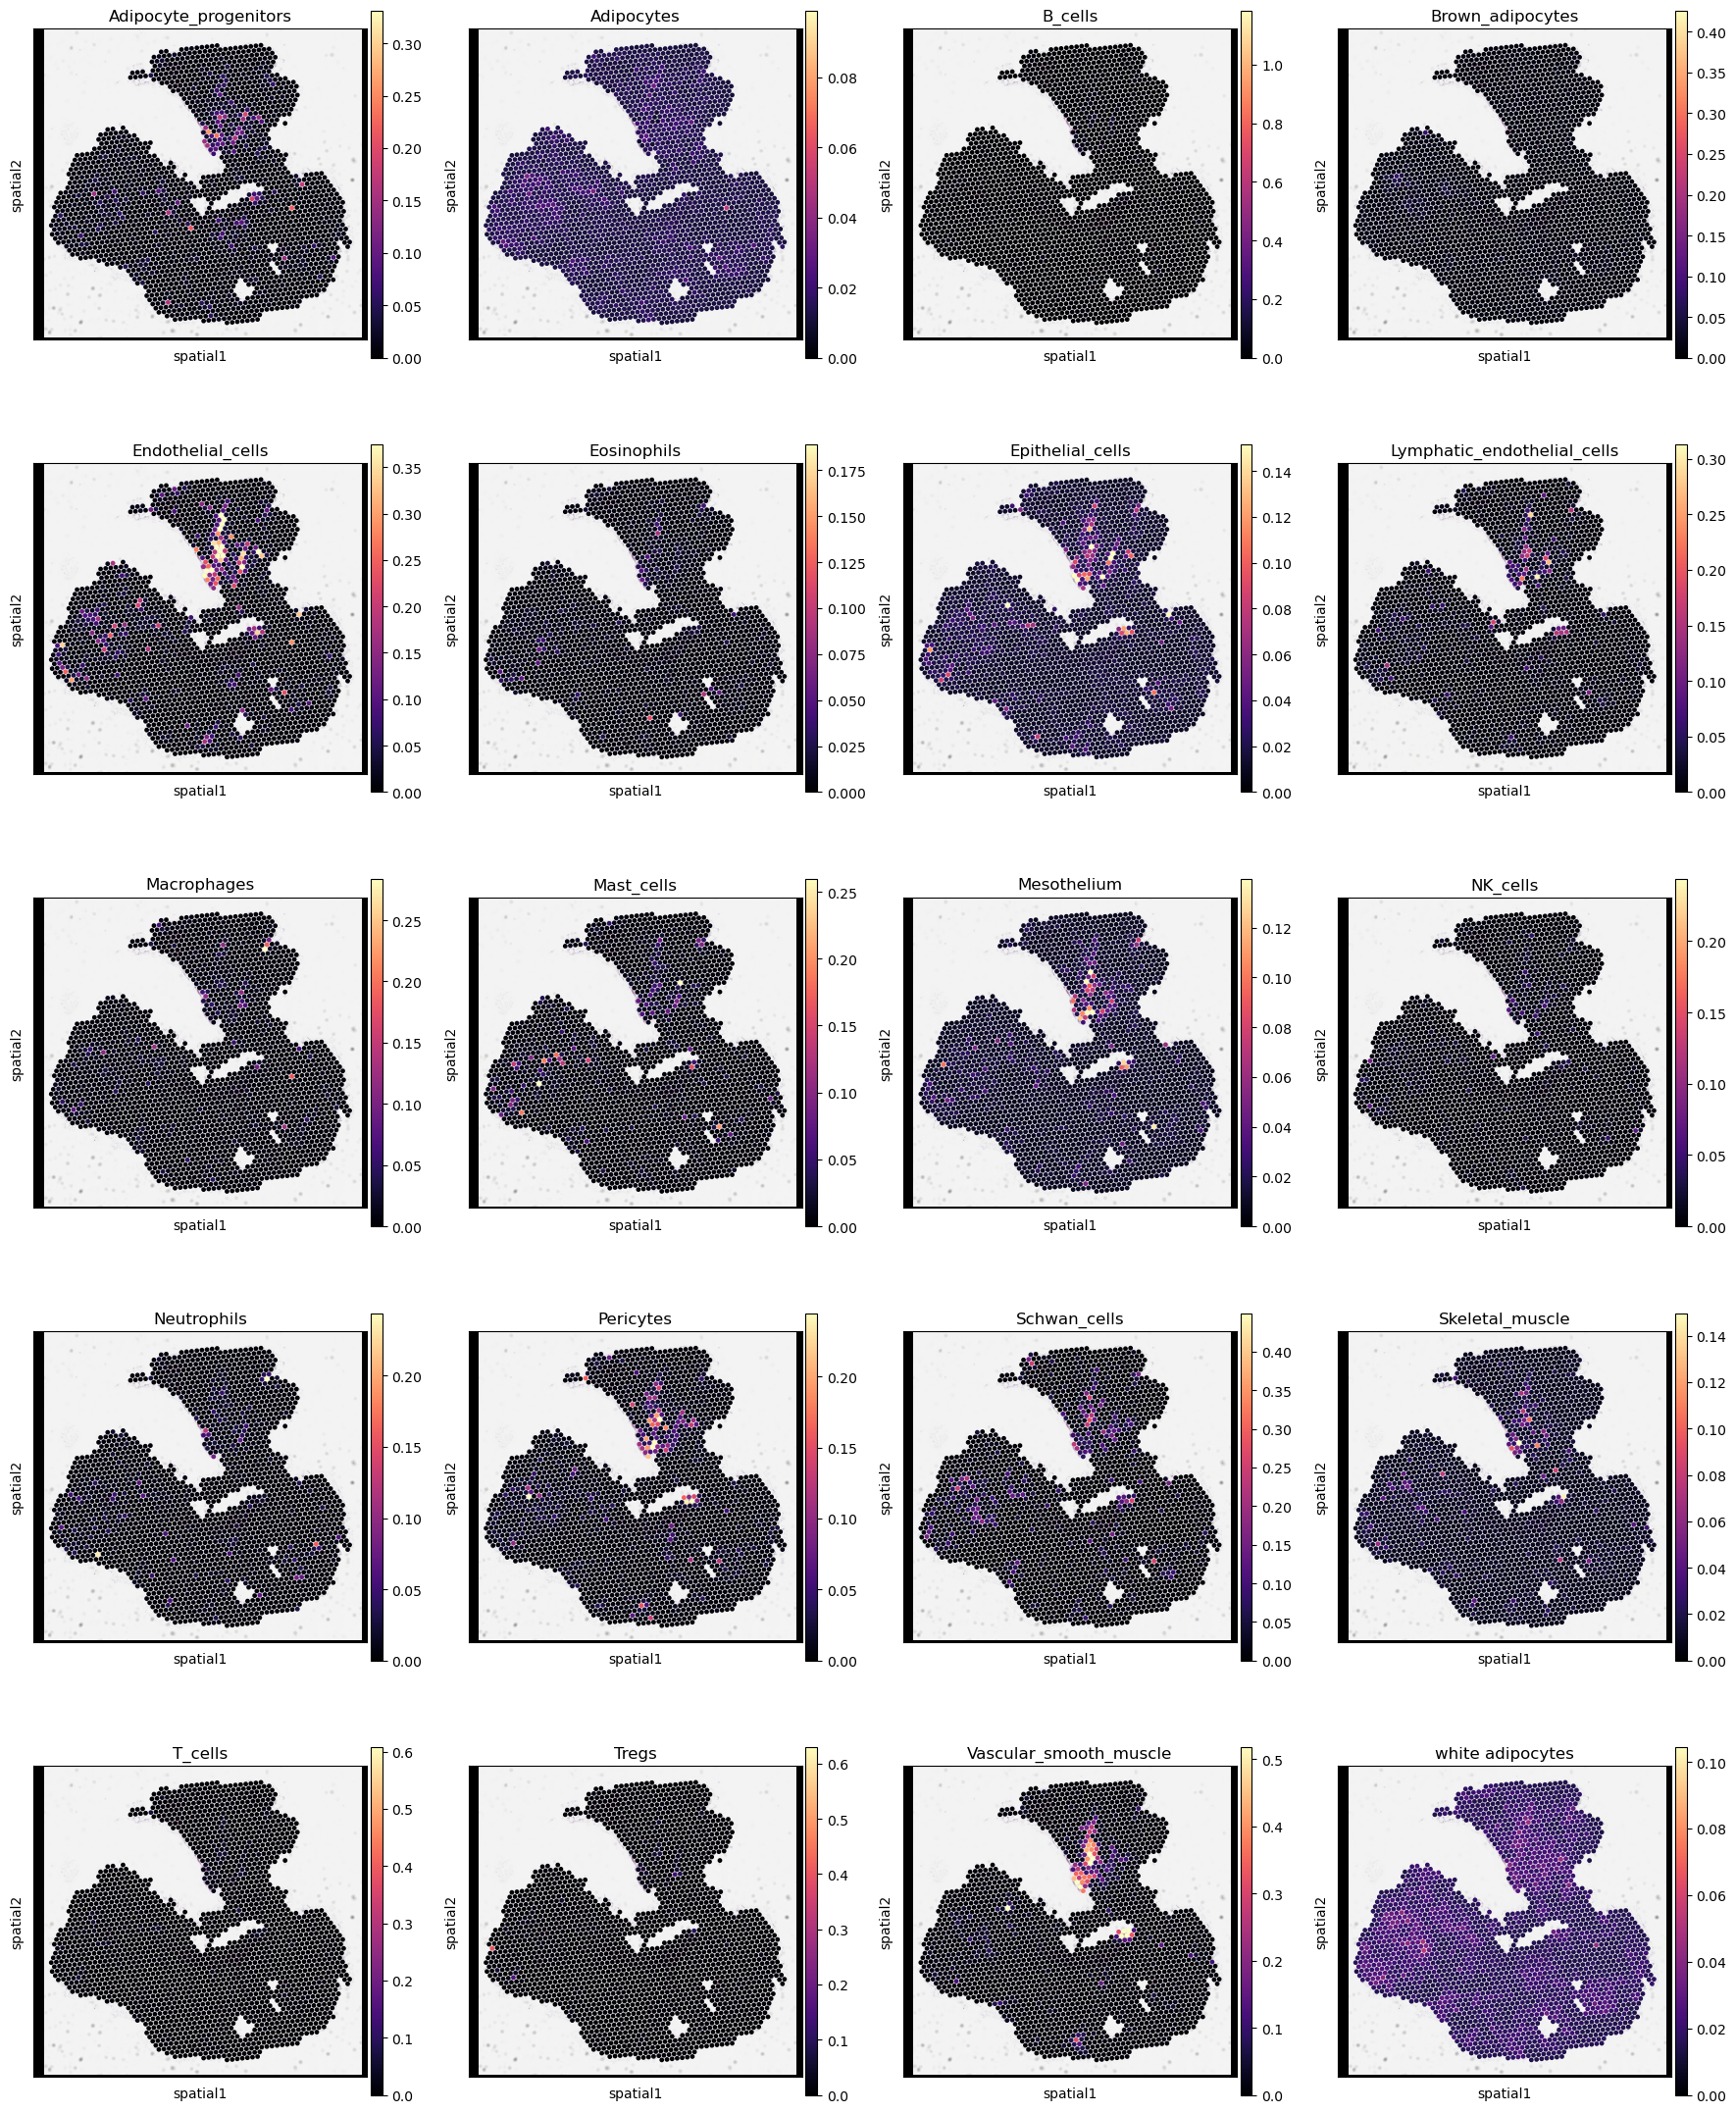

In [6]:
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

# select one slide
from cell2location.utils import select_slide
slide = select_slide(adata_vis, '1149G_A1_096') ## slide name to select here

# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=list(adata_vis.uns['mod']['factor_names']),
                  ncols=4, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax=min_max_means_of_99pctile, show = True
                 )

In [ ]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

# select one slide
from cell2location.utils import select_slide
slide = select_slide(adata_vis, '1149G_A1_096') ## slide name to select here

# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=list(adata_vis.uns['mod']['factor_names']),
                  ncols=4, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax=min_max_means_of_99pctile, show = False
                 )
    plt.savefig('/home/ssobti/projects/farnaz_spatial/output_data/monkey/cell2location/multi_ref_annot/other_outputs/N2_alpha0.5_1149G_A1_096.pdf', bbox_inches="tight")

In [ ]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

# select one slide
from cell2location.utils import select_slide
slide = select_slide(adata_vis, '1572G_D1_096') ## slide name to select here

# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=list(adata_vis.uns['mod']['factor_names']),
                  ncols=4, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax=min_max_means_of_99pctile, show = False
                 )
    plt.savefig('/home/ssobti/projects/farnaz_spatial/output_data/monkey/cell2location/multi_ref_annot/other_outputs/N2_alpha0.5_1572G_D1_096.pdf', bbox_inches="tight")

In [ ]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

# select one slide
from cell2location.utils import select_slide
slide = select_slide(adata_vis, '1080T_A1_327') ## slide name to select here

# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=list(adata_vis.uns['mod']['factor_names']),
                  ncols=4, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax=min_max_means_of_99pctile, show = False
                 )
    plt.savefig('/home/ssobti/projects/farnaz_spatial/output_data/monkey/cell2location/multi_ref_annot/other_outputs/N2_alpha0.5_1080T_A1_327.pdf', bbox_inches="tight")

In [ ]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

# select one slide
from cell2location.utils import select_slide
slide = select_slide(adata_vis, '1080B_D1_327') ## slide name to select here

# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=list(adata_vis.uns['mod']['factor_names']),
                  ncols=4, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax=min_max_means_of_99pctile, show = False
                 )
    plt.savefig('/home/ssobti/projects/farnaz_spatial/output_data/monkey/cell2location/multi_ref_annot/other_outputs/N2_alpha0.5_1080B_D1_327.pdf', bbox_inches="tight")

In [ ]:
# compute KNN using the cell2location output stored in adata.obsm
sc.pp.neighbors(adata_vis, use_rep='q05_cell_abundance_w_sf',
                n_neighbors = 15)

# Cluster spots into regions using scanpy
sc.tl.leiden(adata_vis, resolution=1.1)

# add region as categorical variable
adata_vis.obs["region_cluster"] = adata_vis.obs["leiden"].astype("category")

In [ ]:
# compute UMAP using KNN graph based on the cell2location output
sc.tl.umap(adata_vis, min_dist = 0.3, spread = 1)

# show regions in UMAP coordinates
with mpl.rc_context({'axes.facecolor':  'white',
                     'figure.figsize': [8, 8]}):
    sc.pl.umap(adata_vis, color=['region_cluster'], size=30,
               color_map = 'RdPu', ncols = 2, legend_loc='on data',
               legend_fontsize=20)
    sc.pl.umap(adata_vis, color=['sample'], size=30,
               color_map = 'RdPu', ncols = 2,
               legend_fontsize=20)

In [ ]:
# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):
    sc.pl.spatial(select_slide(adata_vis, '1149G_A1_096'), color=['region_cluster'],
                  size=1.3, img_key='hires', alpha=0.5, library_id='1149G_A1_096')
    sc.pl.spatial(select_slide(adata_vis, '1572G_D1_096'), color=['region_cluster'],
                  size=1.3, img_key='hires', alpha=0.5, library_id='1572G_D1_096')
    sc.pl.spatial(select_slide(adata_vis, '1080T_A1_327'), color=['region_cluster'],
                  size=1.3, img_key='hires', alpha=0.5, library_id='1080T_A1_327')
    sc.pl.spatial(select_slide(adata_vis, '1080B_D1_327'), color=['region_cluster'],
                  size=1.3, img_key='hires', alpha=0.5, library_id='1080B_D1_327')

## NMF

In [ ]:
from cell2location import run_colocation
res_dict, slide = run_colocation(
    adata_vis,
    model_name='CoLocatedGroupsSklearnNMF',
    train_args={
      'n_fact': np.arange(5, 30), # IMPORTANT: use a wider range of the number of factors (5-30)
      'sample_name_col': 'sample', # columns in adata_vis.obs that identifies sample
      'n_restarts': 3 # number of training restarts
    },
    # the hyperparameters of NMF can be also adjusted:
    model_kwargs={'alpha': 0.01, 'init': 'random', "nmf_kwd_args": {"tol": 0.000001}},
    export_args={'path': f'{run_name}/CoLocatedComb/'}
)

In [ ]:
# Compute expected expression per cell type
expected_dict = mod.module.model.compute_expected_per_cell_type(
    mod.samples["post_sample_q05"], mod.adata_manager
)